# Assignment 2

## Importing the Libraries

In [576]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Data Set

In [577]:
air_quality = pd.read_csv('AirQuality_Data.csv')

## Exploring the Data Set

- `air_quality.head()` shows the first 5 rows of the data set.
- `air_quality.info()` shows the number of total range, the data type of each column, the number of columns, and if a column has null or non-null entries. 
- `air_quality.describe()` shows specific information like standard deviation, mean, etc. of the data set. 
- `air_quality.hist()` creates histograms for each column and plots the data from each row in its respective histogram to visualize the data. 
- `sns.pairplot` plots the data from the data set based on the columns to show similarities between the data in all the rows.

In [578]:
air_quality.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [579]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [580]:
air_quality.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [581]:
#air_quality.hist(bins=50, figsize=(20,15))
#plt.show()

## Data Preprocessing

### Dropping unneeded data


In [582]:
air_quality.drop("No", axis = 1, inplace = True)
air_quality.drop("year", axis = 1, inplace = True)
air_quality.drop("month", axis = 1, inplace = True)
air_quality.drop("day", axis = 1, inplace = True)
air_quality.drop("hour", axis = 1, inplace = True)
air_quality.drop("station", axis = 1, inplace = True)
air_quality.drop("RAIN", axis = 1, inplace = True)
air_quality.drop("wd", axis = 1, inplace = True)

## Dropping all other concentrations in the air as we are only focusing on PM2.5
air_quality.drop("PM10", axis = 1, inplace = True)
air_quality.drop("SO2", axis = 1, inplace = True)
air_quality.drop("NO2", axis = 1, inplace = True)
air_quality.drop("CO", axis = 1, inplace = True)
air_quality.drop("O3", axis = 1, inplace = True)

In [583]:
air_quality.to_csv('updated_AirQuality_Data.csv', index=False)

In [584]:
air_quality.head()

,PM2.5,TEMP,PRES,DEWP,WSPM
0,9.0,-0.5,1024.5,-21.4,5.7
1,4.0,-0.7,1025.1,-22.1,3.9
2,7.0,-1.2,1025.3,-24.6,5.3
3,3.0,-1.4,1026.2,-25.5,4.9
4,3.0,-1.9,1027.1,-24.5,3.2


### Imputing missing values using Sklearn

Sklearn SimpleImputer was imported so that the null data entries can be imputed, making every entry a non-null entry.
- `air_quality['SO2']`, `air_quality['NO2']`, `air_quality['CO']`, `air_quality['O3']`1 was imputed using the median strategy

In [585]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

In [586]:

air_quality['PM2.5'] = imputer.fit_transform(air_quality[['PM2.5']])
air_quality['TEMP'] = imputer.fit_transform(air_quality[['TEMP']])
air_quality['PRES'] = imputer.fit_transform(air_quality[['PRES']])
air_quality['DEWP'] = imputer.fit_transform(air_quality[['DEWP']])
air_quality['WSPM'] = imputer.fit_transform(air_quality[['WSPM']])

In [587]:
air_quality.isnull().sum()

PM2.5    0
TEMP     0
PRES     0
DEWP     0
WSPM     0
dtype: int64

In [588]:
air_quality.to_csv('updated_AirQuality_Data.csv', index=False)

In [589]:
air_quality.corr()

,PM2.5,TEMP,PRES,DEWP,WSPM
PM2.5,1.000000,-0.139961,-0.003525,0.124789,-0.298801
TEMP,-0.139961,1.000000,-0.837479,0.819070,0.048829
PRES,-0.003525,-0.837479,1.000000,-0.770305,0.038492
DEWP,0.124789,0.819070,-0.770305,1.000000,-0.278890
WSPM,-0.298801,0.048829,0.038492,-0.278890,1.000000


## Splitting the data into a training and test set using Sklearn

Selecting independent and dependent variables

In [590]:
air_quality.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   35064 non-null  float64
 1   TEMP    35064 non-null  float64
 2   PRES    35064 non-null  float64
 3   DEWP    35064 non-null  float64
 4   WSPM    35064 non-null  float64
dtypes: float64(5)
memory usage: 1.3 MB


In [591]:
x=air_quality[['PM2.5']]
y=air_quality['WSPM']

In [592]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2, random_state=42) 

## Linear Regression

In [593]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
Linear_regressor_model=regressor.fit(x_train, y_train)

#### PM2.5 vs Windspeed

In [594]:
Linear_regressor_model.score(x_train, y_train)

0.08914285931266808

In [595]:
Linear_regressor_model.score(x_test, y_test)

0.08955340967648484

### Using Scikit learn to calculate and predict the root mean squared error (RMSE)

In [596]:
y_pred=regressor.predict(x_test)

In [597]:
# The coefficients
print("Coefficients", regressor.coef_)
print("Intercept", regressor.intercept_)

Coefficients [-0.0044155]
Intercept 2.2363808702552115


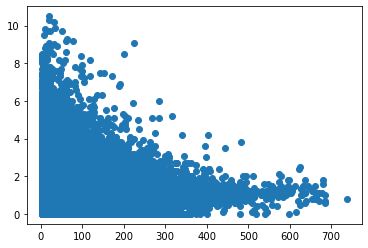

In [598]:
plt.scatter(x_train,y_train)
#plt.plot(x_test,y_pred, color= "red")

In [599]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_true=y_test, y_pred=y_pred, squared=True)
print(MSE)

1.5306315180418968


In [600]:
RMSE=mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
print(RMSE)

1.2371869373873525


## Ridge Regression

In [601]:
from sklearn.linear_model import Ridge

In [602]:
Ridge_model=Ridge(alpha=2, max_iter=100, tol=0.5)
Ridge_model.fit(x_train, y_train)

Ridge(alpha=2, max_iter=100, tol=0.5)

In [603]:
Ridge(alpha=2, max_iter=1000, tol=0.5)

Ridge(alpha=2, max_iter=1000, tol=0.5)

In [604]:
Ridge_model.score(x_train, y_train)

0.08914285931266797

In [605]:
Ridge_model.score(x_test, y_test)

0.0895534095899595

## Lasso Regression

In [606]:
from sklearn.linear_model import Lasso
Lasso_model=Lasso(alpha=100, max_iter=1000, tol=0.5)
Lasso_model.fit(x_train, y_train)

Lasso(alpha=100, tol=0.5)

In [607]:
Lasso_model.score(x_train, y_train)

0.0

In [608]:
Lasso_model.score(x_test, y_test)

-0.0002772621185127555

## ElaticNet

In [609]:
from sklearn.linear_model import ElasticNet
ElasticNet_model=ElasticNet(alpha=.01, l1_ratio=0.5)
ElasticNet_model.fit(x_train, y_train)

ElasticNet(alpha=0.01)

In [610]:
ElasticNet_model.score(x_train, y_train)

0.08914285723132309

In [611]:
ElasticNet_model.score(x_test, y_test)

0.08955202752043323

## Visualize the different Regression Models

In [612]:

from prettytable import PrettyTable

ModuleNotFoundError: No module named 'prettytable'

In [ ]:
myTable=PrettyTable(["Model", "Training_score", "Test_score"])

In [ ]:
myTable.add_row(["Linear Regression", Linear_regressor_model.score(x_train, y_train), Linear_regressor_model.score(x_test, y_test)])
myTable.add_row(["Ridge", Ridge_model.score(x_train, y_train), Ridge_model.score(x_test, y_test)])
myTable.add_row(["Lasso", Lasso_model.score(x_train, y_train), Lasso_model.score(x_test, y_test)])
myTable.add_row(["Elastic Net", ElasticNet_model.score(x_train, y_train), ElasticNet_model.score(x_test, y_test)])

In [ ]:
print(myTable)